In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import sqlite3
from sklearn import (metrics, linear_model, preprocessing)
from sklearn.model_selection import cross_validate

In [261]:
from functions import *

# Line of Action
- subsampling to reduce the size
- dealing with data types
- numerical data encoding as string
- Categorical data encoding as integers
- Detecting and dealing with nulls
- Checking for Multicollinearity
-Checking for Homoscedacity
- Normalizing Data
-Perform modelling

# Import Data From SQL DataBase

In [2]:
con = sqlite3.connect("flightdatabase.db" , detect_types=sqlite3.PARSE_COLNAMES)
cur = con.cursor()

In [ ]:
# cur.execute("""Select * from finalflights where year < 2019;""")
# df1 = pd.DataFrame(cur.fetchall())
# df1.columns = [x[0] for x in cur.description]
# df1.head()

In [264]:
df1 = create_dataframe_from_SQL("""Select * from finalflights where year < 2019;""")
df1

,field1,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,0,2010-01-01,Atlanta,2735491,Domestic,1,2010,3.6,137.0,7.0,1019.50,100.99,429193.0,Atlanta,33.7627,-84.4225,United States,US,USA
1,1,2010-01-01,Washington,1929494,Domestic,1,2010,0.4,57.0,8.0,1016.70,98.19,605085.0,Washington,38.9047,-77.0163,United States,US,USA
2,2,2010-01-01,Singapore,1681005,International,1,2010,27.5,70.0,8.0,1011.60,65.94,5074252.0,Singapore,1.2930,103.8558,Singapore,SG,SGP
3,3,2010-01-01,Berlin,489487,International,1,2010,-4.9,21.0,7.0,1014.78,115.24,3450395.0,Berlin,52.5218,13.4015,Germany,DE,DEU
4,4,2010-01-01,Paris,4154249,International,1,2010,0.6,36.0,7.0,1015.60,130.30,10460118.0,Paris,48.8667,2.3333,France,FR,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4963,2018-12-01,New York City,3794306,Domestic,12,2018,4.7,175.0,11.0,1019.10,100.00,8398748.0,New York City,40.6943,-73.9249,United States,US,USA
4964,4964,2018-12-01,Minneapolis,1295947,Domestic,12,2018,-3.3,39.0,4.0,1018.50,81.46,425403.0,Minneapolis,44.9635,-93.2678,United States,US,USA
4965,4965,2018-12-01,Los Angeles,3491734,Domestic,12,2018,14.8,37.0,2.0,1017.90,82.30,3990456.0,Los Angeles,34.1139,-118.4068,United States,US,USA
4966,4966,2018-12-01,Los Angeles,3491734,Domestic,12,2018,14.8,37.0,2.0,1017.90,82.30,3990456.0,Los Angeles,-37.4600,-72.3600,Chile,CL,CHL


In [4]:
#Check for null values
df1.isna().sum()

field1                  0
ds                      0
city                    0
PASSENGERS              0
Type                    0
Month                   0
Year                    0
temperature_mean        0
precipitation           0
rain_days               0
pressure                0
cost_of_living_index    0
population              0
city_ascii              0
lat                     0
lng                     0
country                 0
iso2                    0
iso3                    0
dtype: int64

In [5]:
#Dropping Columns
df1.drop(['Year','Month' ], axis = 1, inplace = True)

In [6]:
#Coverting the date variable to ordinary values
import datetime as dt
df1['ds'] = pd.to_datetime(df1['ds'])
df1['ds']=df1['ds'].map(dt.datetime.toordinal)

# Plot a histogram to view dataframe

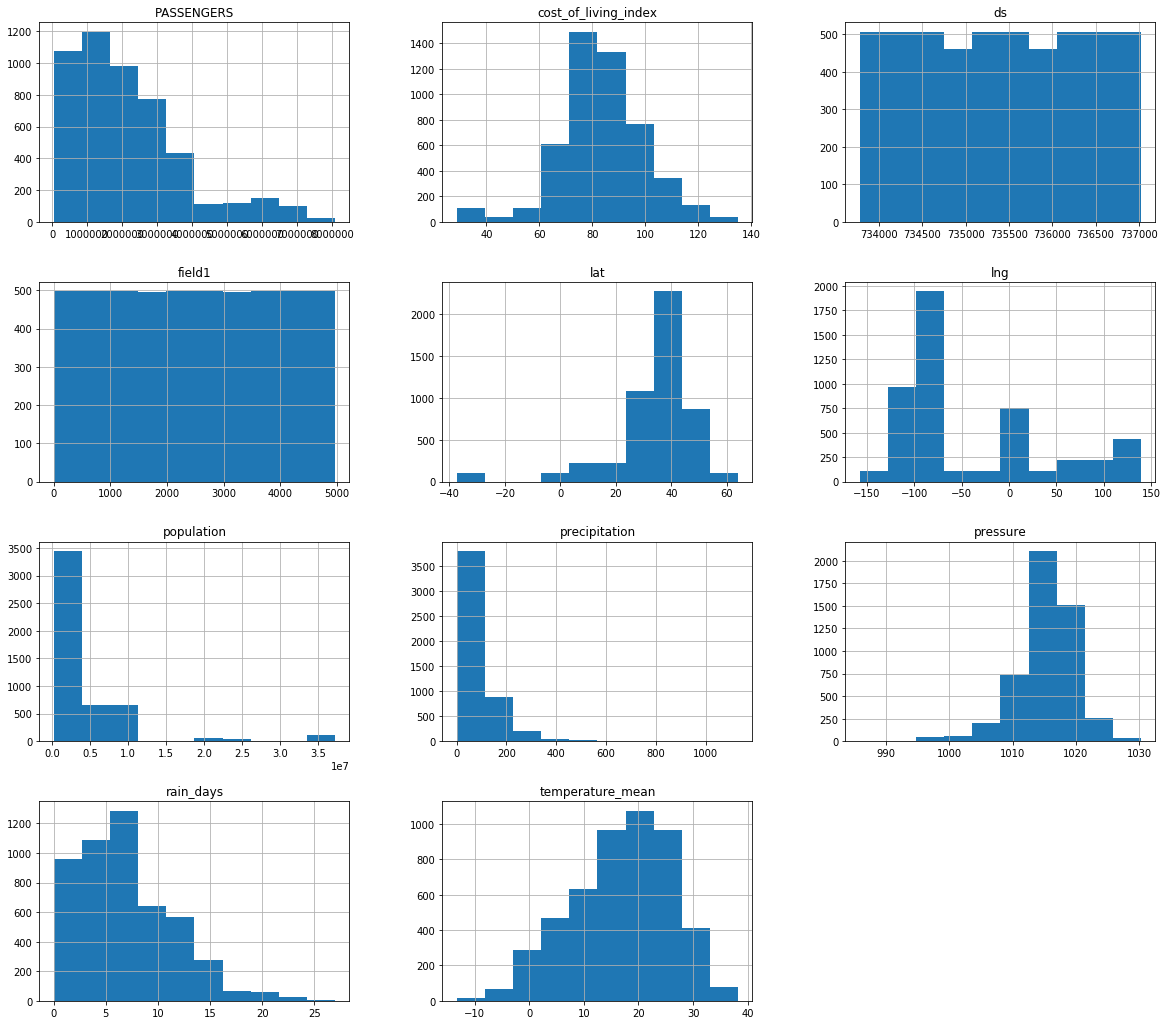

In [182]:
df1.hist(figsize = (20,18));

# Distribution of Passengers

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



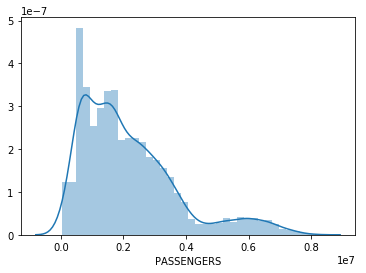

In [183]:
import seaborn as sns
# from ggplot import *
sns.distplot(Y)

# checking for outliers

In [184]:
s = list(np.arange(2, 100, 2))
for p in s:
     print ('the percentile at ' + str(p) + ": ", np.percentile(Y, p))


the percentile at 2:  196000.0
the percentile at 4:  426590.28
the percentile at 6:  496980.31999999995
the percentile at 8:  540851.0
the percentile at 10:  571955.1
the percentile at 12:  610008.9600000001
the percentile at 14:  659338.3
the percentile at 16:  698749.12
the percentile at 18:  747009.0
the percentile at 20:  804086.2
the percentile at 22:  860822.94
the percentile at 24:  930623.52
the percentile at 26:  1016491.9800000002
the percentile at 28:  1099389.2
the percentile at 30:  1164121.7
the percentile at 32:  1230964.52
the percentile at 34:  1293258.58
the percentile at 36:  1364484.7599999998
the percentile at 38:  1434382.78
the percentile at 40:  1496745.0
the percentile at 42:  1550648.2
the percentile at 44:  1609077.6
the percentile at 46:  1658115.08
the percentile at 48:  1721755.24
the percentile at 50:  1787230.0
the percentile at 52:  1850949.44
the percentile at 54:  1931905.0
the percentile at 56:  2029171.0000000005
the percentile at 58:  2119437.15999

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



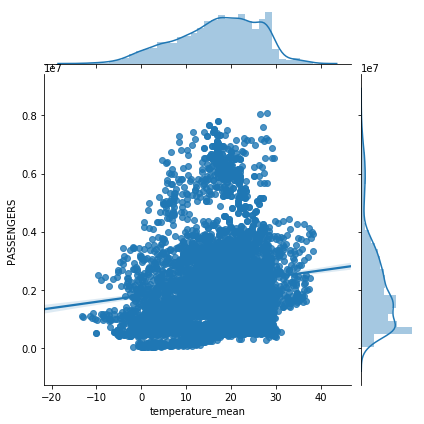

In [185]:
sns.jointplot(x='temperature_mean' , y = 'PASSENGERS' , data = df1 , kind = 'reg')

In [ ]:
# Passegners Vs Cost of Living Index

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



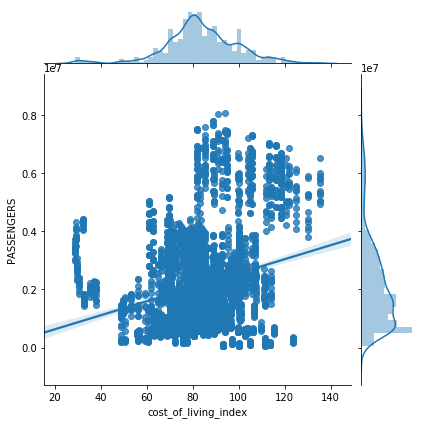

In [186]:
sns.jointplot(x='cost_of_living_index' , y = 'PASSENGERS' , data=df1, kind = 'reg')

# Precipitation Vs Passengers

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



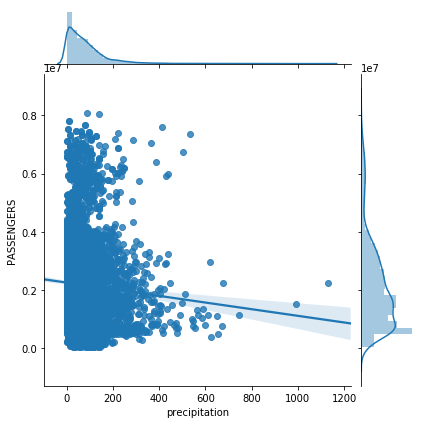

In [187]:
sns.jointplot(x='precipitation' , y = 'PASSENGERS' , data = df1 , kind='reg')

# Correlation matrics

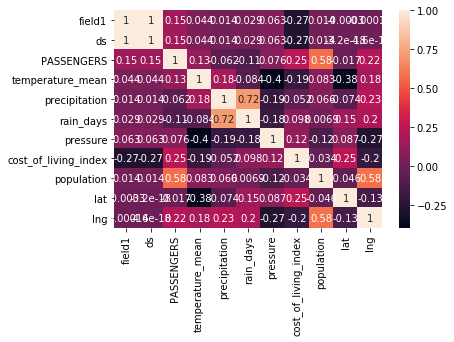

In [13]:
sns.heatmap(df0.corr() , annot = True)

# Check categrical variables be considered as continous or categirical?

In [76]:

x = ['city_ascii', 'city', 'country', 'iso3', 'iso2', 'Type']

for j in range(len(x)):
    field = x[j]
    print ('-------------------- ' + field + ' -----------------------------')
    z = ['levels for the variable '+ field + ':']
    s = df1[field].value_counts()
    ind = list(s.index)
    z.extend(ind)
    print (z)
    
    z = ['# of levels for the variable '+ field + ':']
    s = list(df1[field].value_counts())
    z.extend(s)
    print (z)
    
    z = ['# of categories for the variable '+ field + ':']
    z.extend([len(s)])
    print (z)
    print ('-------------------------------------------------')


-------------------- city_ascii -----------------------------
['levels for the variable city_ascii:', 'Portland', 'London', 'Barcelona', 'Los Angeles', 'Salt Lake City', 'Croatia', 'Philadelphia', 'Chicago', 'Miami', 'New York City', 'San Francisco', 'Seoul', 'Singapore', 'Amsterdam', 'St. Louis', 'Reykjavik', 'Paris', 'Atlanta', 'Delhi', 'Taipei', 'Orlando', 'Phuket', 'Minneapolis', 'Seattle', 'Honolulu', 'Tampa', 'Boston', 'Denver', 'Hong Kong', 'Dubai', 'Rome', 'Tokyo', 'Detroit', 'Athens', 'Phoenix', 'Charlotte', 'Houston', 'Berlin', 'San Diego', 'Las Vegas', 'Washington', 'Dallas']
['# of levels for the variable city_ascii:', 216, 216, 216, 216, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108]
['# of categories for the variable city_ascii:', 42]
-------------------------------------------------
-------------------- city ----------------------

# Check for Numerical Variables and Categorical Variables

In [7]:
cat_cols = list(set(df1.columns) - set(df1._get_numeric_data().columns))
cat_cols

['iso2', 'Type', 'city', 'city_ascii', 'iso3', 'country']

In [8]:
num_cols = list(df1._get_numeric_data().columns)
num_cols

['field1',
 'ds',
 'PASSENGERS',
 'temperature_mean',
 'precipitation',
 'rain_days',
 'pressure',
 'cost_of_living_index',
 'population',
 'lat',
 'lng']

# The Plot of Correlation Matrics Using Heatmap and Check for Multicollinearity

In [9]:
target = 'PASSENGERS'

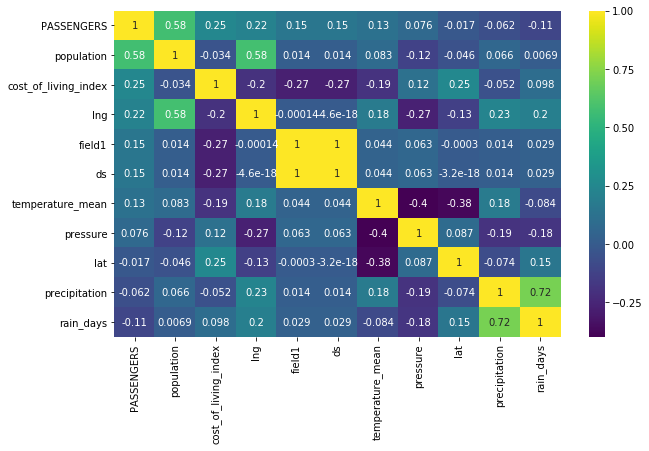

In [10]:
k = 15
cols = df1[num_cols].corr().nlargest(k , target)[target].index
cm = df1[cols].corr()
plt.figure(figsize = (10 ,6))
sns.heatmap(cm , annot = True , cmap = 'viridis')

In [72]:
df1.drop('field1' ,1, inplace = True)

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 16 columns):
ds                      4968 non-null int64
city                    4968 non-null object
PASSENGERS              4968 non-null int64
Type                    4968 non-null object
temperature_mean        4968 non-null float64
precipitation           4968 non-null float64
rain_days               4968 non-null float64
pressure                4968 non-null float64
cost_of_living_index    4968 non-null float64
population              4968 non-null float64
city_ascii              4968 non-null object
lat                     4968 non-null float64
lng                     4968 non-null float64
country                 4968 non-null object
iso2                    4968 non-null object
iso3                    4968 non-null object
dtypes: float64(8), int64(2), object(6)
memory usage: 621.1+ KB


In [72]:
#make a copy of the dataframe
df0 = df1.copy()

In [60]:
df0

,field1,ds,city,PASSENGERS,Type,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,0,733773,Atlanta,2735491,Domestic,3.6,137.0,7.0,1019.50,100.99,429193.0,Atlanta,33.7627,-84.4225,United States,US,USA
1,1,733773,Washington,1929494,Domestic,0.4,57.0,8.0,1016.70,98.19,605085.0,Washington,38.9047,-77.0163,United States,US,USA
2,2,733773,Singapore,1681005,International,27.5,70.0,8.0,1011.60,65.94,5074252.0,Singapore,1.2930,103.8558,Singapore,SG,SGP
3,3,733773,Berlin,489487,International,-4.9,21.0,7.0,1014.78,115.24,3450395.0,Berlin,52.5218,13.4015,Germany,DE,DEU
4,4,733773,Paris,4154249,International,0.6,36.0,7.0,1015.60,130.30,10460118.0,Paris,48.8667,2.3333,France,FR,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4963,737029,New York City,3794306,Domestic,4.7,175.0,11.0,1019.10,100.00,8398748.0,New York City,40.6943,-73.9249,United States,US,USA
4964,4964,737029,Minneapolis,1295947,Domestic,-3.3,39.0,4.0,1018.50,81.46,425403.0,Minneapolis,44.9635,-93.2678,United States,US,USA
4965,4965,737029,Los Angeles,3491734,Domestic,14.8,37.0,2.0,1017.90,82.30,3990456.0,Los Angeles,34.1139,-118.4068,United States,US,USA
4966,4966,737029,Los Angeles,3491734,Domestic,14.8,37.0,2.0,1017.90,82.30,3990456.0,Los Angeles,-37.4600,-72.3600,Chile,CL,CHL


In [61]:
df0.columns

Index(['field1', 'ds', 'city', 'PASSENGERS', 'Type', 'temperature_mean',
       'precipitation', 'rain_days', 'pressure', 'cost_of_living_index',
       'population', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3'],
      dtype='object')

In [73]:
df0.drop('field1' , 1 , inplace = True)

In [63]:
df0.columns

Index(['ds', 'city', 'PASSENGERS', 'Type', 'temperature_mean', 'precipitation',
       'rain_days', 'pressure', 'cost_of_living_index', 'population',
       'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3'],
      dtype='object')

In [177]:
df2 = df1.copy()

# Generate Dummies for Categorical Columns

In [23]:
cat_cols

['iso2', 'Type', 'city', 'city_ascii', 'iso3', 'country']

In [74]:
# city_ascii = 'city_ascii' + '_' + df0.city_ascii.astype(str)
# df_city_ascii = pd.get_dummies(city_ascii)

# city = 'city' + '_' + df0.city.astype(str)
# df_city = pd.get_dummies(city)

# country = 'country' + '_' + df0.country.astype(str)
# df_country = pd.get_dummies(country)

# iso3 = 'iso3' + '_' + df0.iso3.astype(str)
# df_iso3 = pd.get_dummies(iso3)

# iso2 = 'iso2' + '_' + df0.iso2.astype(str)
# df_iso2 = pd.get_dummies(iso2)

Type = 'Type'+ '_' + df0.Type.astype(str)
df_Type = pd.get_dummies(Type , drop_first=True)


for x in [df_Type]:
    df0 = pd.concat([df0 , x] , axis = 1)
    
print(df1.shape)
df0.head()

(4968, 17)


,ds,city,PASSENGERS,Type,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3,Type_International
0,733773,Atlanta,2735491,Domestic,3.6,137.0,7.0,1019.50,100.99,429193.0,Atlanta,33.7627,-84.4225,United States,US,USA,0
1,733773,Washington,1929494,Domestic,0.4,57.0,8.0,1016.70,98.19,605085.0,Washington,38.9047,-77.0163,United States,US,USA,0
2,733773,Singapore,1681005,International,27.5,70.0,8.0,1011.60,65.94,5074252.0,Singapore,1.2930,103.8558,Singapore,SG,SGP,1
3,733773,Berlin,489487,International,-4.9,21.0,7.0,1014.78,115.24,3450395.0,Berlin,52.5218,13.4015,Germany,DE,DEU,1
4,733773,Paris,4154249,International,0.6,36.0,7.0,1015.60,130.30,10460118.0,Paris,48.8667,2.3333,France,FR,FRA,1


In [77]:
df0.drop(columns = {'city' ,'city_ascii','country','iso2','iso3'} , inplace = True)

In [85]:
df0.drop('Type' , 1 , inplace = True)

# modelling with Statsmodel

In [280]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [293]:
outcome = 'PASSENGERS'
x_cols = ['temperature_mean','precipitation','rain_days','pressure','cost_of_living_index','population','lat','lng']

In [304]:
dfnew = df1.copy()

In [308]:
dfnew.drop('field1' , 1 , inplace = True)

# some brief preprocessing

In [309]:
dfnew.columns = [col.replace("","_") for col in dfnew.columns]
for col in x_cols:
    dfnew[col] = (dfnew[col] - dfnew[col].mean())/dfnew[col].std()
dfnew.head()    

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,2010-01-01,Atlanta,2735491,Domestic,1,2010,-1.465700,0.675845,0.029375,0.898949,1.077087,-0.536458,Atlanta,-0.054228,-0.551928,United States,US,USA
1,2010-01-01,Washington,1929494,Domestic,1,2010,-1.817862,-0.267331,0.245274,0.312224,0.902155,-0.509404,Washington,0.271057,-0.459175,United States,US,USA
2,2010-01-01,Singapore,1681005,International,1,2010,1.164511,-0.114065,0.245274,-0.756452,-1.112693,0.177998,Singapore,-2.108274,1.806009,Singapore,SG,SGP
3,2010-01-01,Berlin,489487,International,1,2010,-2.401130,-0.691761,0.029375,-0.090101,1.967369,-0.071767,Berlin,1.132480,0.673189,Germany,DE,DEU
4,2010-01-01,Paris,4154249,International,1,2010,-1.795852,-0.514915,0.029375,0.081725,2.908256,1.006397,Paris,0.901257,0.534574,France,FR,FRA


In [331]:
train , test = train_test_split(dfnew)

In [311]:
from statsmodels.formula.api import ols
#fitting the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula , data = dfnew).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PASSENGERS   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     547.0
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:12:45   Log-Likelihood:                -76311.
No. Observations:                4968   AIC:                         1.526e+05
Df Residuals:                    4959   BIC:                         1.527e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.168e+06   1.61e+04    134.566      0.000    2.14e+06     2.2e+06
temperature_mean      3.298e+05   1.98e+04     16.629      0.000    2.91e+05    3.69e+05
precipitation        -7.753e+04   2.51e+04     -3.090      0.002   -1.27e+05   -2.83e+04
rain_days            -6.564e+04   2.58e+04     -2.543      0.011   -1.16e+05    -1.5e+04
pressure              2.695e+05   1.85e+04     14.600      0.000    2.33e+05    3.06e+05
cost_of_living_index  4.353e+05   1.73e+04     25.224      0.000    4.01e+05    4.69e+05
population            9.801e+05   2.02e+04     48.546      0.000    9.41e+05    1.02e+06
lat                    753.4067   1.81e+04      0.042      0.967   -3.48e+04    3.63e+04
lng                   -8.87e+04   2.16e+04     -4.108      0.000   -1.31e+05   -4.64e+04
==============================================================================
Omnibus:                      310.589   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.050
Skew:                           0.614   Prob(JB):                     1.80e-83
Kurtosis:                       3.577   Cond. No.                         3.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking for Multicollinearity

In [317]:
X2 = dfnew[x_cols]
vif = [variance_inflation_factor(X2.values , i) for i in range(X2.shape[1])]
list(zip(x_cols , vif))

[('temperature_mean', 1.515671742835012),
 ('precipitation', 2.425308728168441),
 ('rain_days', 2.5673963950267993),
 ('pressure', 1.312619413941749),
 ('cost_of_living_index', 1.1474078245030446),
 ('population', 1.5701465271952202),
 ('lat', 1.2651850240781812),
 ('lng', 1.7957968898545817)]

Comment: While the p-values indicate that all of the current features are impactful, the variance inflation factor indicates that there is moderate multicollinearity between our variables. With that, it makes sense to briefly update the features once again and recheck for multicollinearity.

In [326]:
outcome = 'PASSENGERS'
x_cols = dfnew[['temperature_mean','precipitation', 'rain_days', 'pressure','cost_of_living_index','population','lat','lng']]
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=dfnew).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PASSENGERS   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     547.0
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:31:45   Log-Likelihood:                -76311.
No. Observations:                4968   AIC:                         1.526e+05
Df Residuals:                    4959   BIC:                         1.527e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.168e+06   1.61e+04    134.566      0.000    2.14e+06     2.2e+06
temperature_mean      3.298e+05   1.98e+04     16.629      0.000    2.91e+05    3.69e+05
precipitation        -7.753e+04   2.51e+04     -3.090      0.002   -1.27e+05   -2.83e+04
rain_days            -6.564e+04   2.58e+04     -2.543      0.011   -1.16e+05    -1.5e+04
pressure              2.695e+05   1.85e+04     14.600      0.000    2.33e+05    3.06e+05
cost_of_living_index  4.353e+05   1.73e+04     25.224      0.000    4.01e+05    4.69e+05
population            9.801e+05   2.02e+04     48.546      0.000    9.41e+05    1.02e+06
lat                    753.4067   1.81e+04      0.042      0.967   -3.48e+04    3.63e+04
lng                   -8.87e+04   2.16e+04     -4.108      0.000   -1.31e+05   -4.64e+04
==============================================================================
Omnibus:                      310.589   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.050
Skew:                           0.614   Prob(JB):                     1.80e-83
Kurtosis:                       3.577   Cond. No.                         3.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking for normality

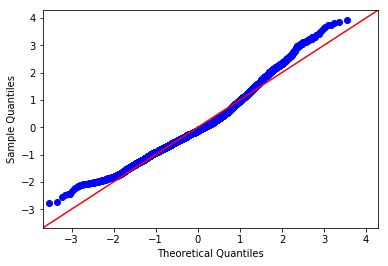

In [328]:

import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [334]:
dfnew

,ds,city,PASSENGERS,Type,Month,Year,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,2010-01-01,Atlanta,2735491,Domestic,1,2010,-1.465700,0.675845,0.029375,0.898949,1.077087,-0.536458,Atlanta,-0.054228,-0.551928,United States,US,USA
1,2010-01-01,Washington,1929494,Domestic,1,2010,-1.817862,-0.267331,0.245274,0.312224,0.902155,-0.509404,Washington,0.271057,-0.459175,United States,US,USA
2,2010-01-01,Singapore,1681005,International,1,2010,1.164511,-0.114065,0.245274,-0.756452,-1.112693,0.177998,Singapore,-2.108274,1.806009,Singapore,SG,SGP
3,2010-01-01,Berlin,489487,International,1,2010,-2.401130,-0.691761,0.029375,-0.090101,1.967369,-0.071767,Berlin,1.132480,0.673189,Germany,DE,DEU
4,2010-01-01,Paris,4154249,International,1,2010,-1.795852,-0.514915,0.029375,0.081725,2.908256,1.006397,Paris,0.901257,0.534574,France,FR,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,2018-12-01,New York City,3794306,Domestic,12,2018,-1.344644,1.123853,0.892970,0.815131,1.015236,0.689338,New York City,0.384268,-0.420459,United States,US,USA
4964,2018-12-01,Minneapolis,1295947,Domestic,12,2018,-2.225049,-0.479546,-0.618321,0.689404,-0.143067,-0.537041,Minneapolis,0.654339,-0.662704,United States,US,USA
4965,2018-12-01,Los Angeles,3491734,Domestic,12,2018,-0.233132,-0.503126,-1.050118,0.563678,-0.090587,0.011299,Los Angeles,-0.032011,-0.977536,United States,US,USA
4966,2018-12-01,Los Angeles,3491734,Domestic,12,2018,-0.233132,-0.503126,-1.050118,0.563678,-0.090587,0.011299,Los Angeles,-4.559805,-0.400861,Chile,CL,CHL


# Checking for Homoscedasticity Assumption

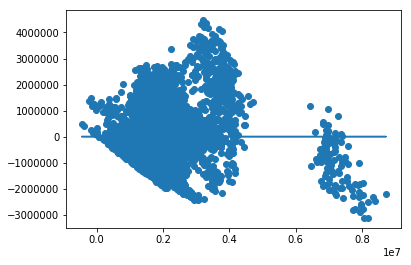

In [333]:
plt.scatter(model.predict(dfnew[x_cols]), model.resid)
plt.plot(model.predict(dfnew[x_cols]), [0 for i in range(len(dfnew))])

# Linear Regression Model Training

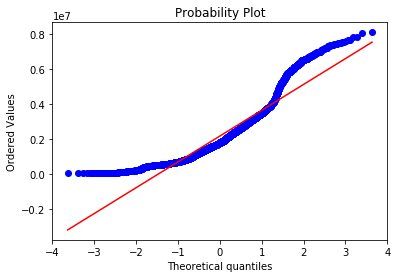

In [84]:
import numpy as np 
import pylab 
import scipy.stats as stats1

Y = df1.PASSENGERS
stats1.probplot(Y, dist="norm", plot=pylab)
pylab.show()

In [17]:
# regr = linear_model.LinearRegression()
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#    #Fitting the model to the training dataset
# regr.fit(x_train,y_train)
# regr.intercept_
# print('Coefficients: \n', regr.coef_)
# print("Mean Squared Error(MSE): %.2f"
#          % np.mean((regr.predict(x_test) - y_test) ** 2))
# print('Variance Score: %.2f' % regr.score(x_test, y_test))
#    regr.coef_[0].tolist()

In [86]:
X = df0.drop('PASSENGERS' , 1)
y = df0['PASSENGERS']

In [ ]:
from sklearn cross_validation 

In [87]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [131]:
# Print the shapes of the training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3974, 10)
(994, 10)
(3974,)
(994,)


In [88]:
X_train.head()

,ds,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,lat,lng,Type_International
1477,734747,16.6,99.0,9.0,1019.4,118.52,8044433.0,42.9700,-81.2500,1
4054,736450,27.7,0.0,0.0,1007.5,69.08,1634984.0,33.5722,-112.0891,0
2218,735234,22.6,63.0,9.0,1013.5,106.27,349627.0,21.3294,-157.8460,0
4102,736481,26.7,14.0,4.0,1017.0,99.54,349651.0,21.3294,-157.8460,0
80,733804,-0.8,53.0,7.0,1019.2,80.35,319318.0,38.6358,-90.2451,0


In [29]:
#import Linear Regression Model
from sklearn import linear_model

In [30]:
#create an instance for the linear Regression Model
lm = linear_model.LinearRegression()

In [89]:
#Train your model on X_train and y_train
lm.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Check intercepts

In [91]:
lm.intercept_

-309913186.06459874

In [119]:
print("The Estimated Intercept %.2f"%lm.intercept_)

The Estimated Intercept -309913186.06


# Check Coefficients

In [92]:
lm.coef_

array([ 3.50446599e+02,  2.69876600e+04,  9.18740433e+02, -3.53494667e+04,
        4.94474927e+04,  3.03404942e+04,  1.52994006e-01, -7.80762035e+03,
       -9.24708546e+03,  1.55396734e+06])

In [125]:

print("The Estimated Intercept %d"%len(lm.coef_))
print("----------------------------------------")
print(lm.coef_)

The Estimated Intercept 10
----------------------------------------
[ 3.50446599e+02  2.69876600e+04  9.18740433e+02 -3.53494667e+04
  4.94474927e+04  3.03404942e+04  1.52994006e-01 -7.80762035e+03
 -9.24708546e+03  1.55396734e+06]


In [94]:
#Lets create a new dataframe for our coefficients
X.columns
coeff = pd.DataFrame(data = lm.coef_ , index = X.columns , columns = ['Coefficients'])

In [95]:
coeff

,Coefficients
ds,3.504466e+02
temperature_mean,2.698766e+04
precipitation,9.187404e+02
rain_days,-3.534947e+04
pressure,4.944749e+04
cost_of_living_index,3.034049e+04
population,1.529940e-01
lat,-7.807620e+03
lng,-9.247085e+03
Type_International,1.553967e+06


# Explaining The Results of the Coefficients
- An increase or decrese in the coefficients has an effect on the target ie Passengers in this case

# Prediction

In [98]:
pred = lm.predict(X_test)

In [99]:
pred

array([1776616.48971528, 3491671.14863223, 1972372.01035529,
       1805659.94344348, 1076569.32029617, 2024097.86065352,
       2367479.29139203, 2188882.12713653, 2740087.21921486,
       1906074.79065549, 7524853.56394428, 2294538.33303875,
       1943874.59837228, 1800598.61049557, 3848784.03251499,
       1932128.93987983, 1691920.18728876, 2226488.88513392,
       1320921.14248013, 2374059.14730787, 1229825.92609286,
       1849451.83347869, 1431825.02114642, 2054121.20455945,
       1732204.79847938, 2029658.64130849, 4962783.73819178,
       1182701.73650056, 2259560.18525881, 1831130.22010583,
       2553141.24199849, 3828908.0048151 , 1928018.53266674,
       1498574.38514775, 1669321.08165509, 2153527.24033713,
       2141809.25137913, 2982655.43046528, 2017511.7564857 ,
       2436207.9011113 , 2340270.0874151 ,  999577.66082084,
       4092098.84913605,  961694.41937417, 4173824.87291098,
        782013.70253807, 1394541.0325827 , 2323122.19779032,
       3408250.00627977,

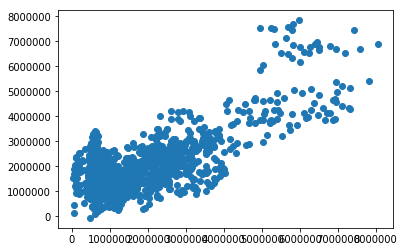

In [100]:
plt.scatter(y_test , pred)

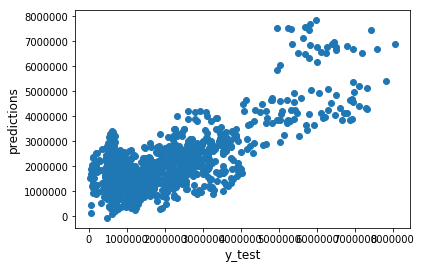

In [113]:
plt.scatter(y_test , pred)
plt.xlabel('y_test' , fontsize = 12)
plt.ylabel('predictions' , fontsize = 12)
plt.show()

# Recreate a histogram for the residuals : y_test - prediction

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



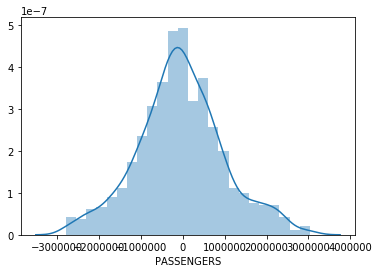

In [115]:
sns.distplot(y_test - pred)
plt.show()

# Calculate Metrics

In [103]:
from sklearn import metrics

In [111]:
print('MAE :',metrics.mean_absolute_error(y_test , pred))
print('MSE :',metrics.mean_squared_error(y_test , pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test , pred)))

MAE : 798341.30176276
MSE : 1084186725245.7777
RMSE : 1041242.875243705


# Mean Square Error (MSE) or the residuals sum of squares

In [140]:
print("Mean Squared Error(MSE): %.2f"
         % np.mean((lm.predict(X_test) - y_test) ** 2))

Mean Squared Error(MSE): 1084186725245.78


# Checking r2

### Rules of r2

- r2 < 0.19   - very weak relationship/correlation between variables
- 0.20 - 0.39 - weak relationship/correlation
- 0.4 - 0.59 - moderate relationship
- 0.6 - 0.79 - strong relationship

# To be sure that our predictions we need to check for our r2

In [149]:
from sklearn.metrics import mean_squared_error , r2_score
print(r2_score(y_test , pred))

0.5633232867125878


# Calculate the varaince

### The closer the number is to 1 the better the accuracy of the model

In [143]:
print("variance score is %.2f"%lm.score(X_test , y_test))

variance score is 0.56


# FINAL PREDICTION Into A Dataframe

1010405.2542907607
1041242.875243705


,Actual,Predicted
856,2690353,1.776616e+06
3656,3360871,3.491671e+06
4900,1787661,1.972372e+06
4177,1038264,1.805660e+06
3867,1163942,1.076569e+06
2295,2389606,2.024098e+06
4238,2465729,2.367479e+06
2634,2947033,2.188882e+06
350,654910,2.740087e+06
4049,835387,1.906075e+06


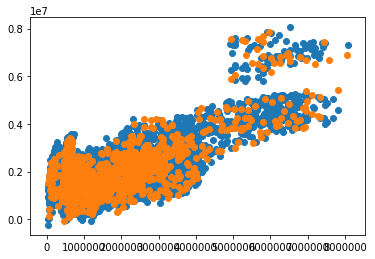

In [163]:
from sklearn.metrics import mean_squared_error

plt.scatter(y_train, lm.predict(X_train))
print(np.sqrt(mean_squared_error(y_train, lm.predict(X_train))))
plt.scatter(y_test, lm.predict(X_test))
print(np.sqrt(mean_squared_error(y_test, lm.predict(X_test))))
pd.DataFrame({'Actual':y_test, 'Predicted': lm.predict(X_test)}).head(10)

# Regularization

### Regularisation is used to solve overfitting to the training data by restricting the value or parameters that are estimated in the model
### Note : It doesnt improve the model performance of the algorithm on the dataset that has been defined as per the model parameters. It can improve the generalization performance.

# Ridge Regression L2 
`- It is used when there is the problem of multicollinearity . By adding a degree of bias to the regression estimates
  ,Ridge regression reduces the standard errors`

In [164]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.0001, normalize=True)
ridgeReg.fit(X_train,y_train)
print(np.sqrt(mean_squared_error(y_train, ridgeReg.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, ridgeReg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test, y_test)))

1010405.3146769239
1041239.3443338225
R2 Value/Coefficient of Determination: 0.563326248295413


# Lasso Regression (L1)
`- Similar to Ridge , but it also performs feature selection . It uses shrinkage , where data values are shrunk toward
  a central point like the mean`.
    
    `- It tends to exclude variables that are not required from the equation ,whereas Ridge tends to do better when   all the variables are present`.

`- Lasso is well suited for models showing high levels of multicollinearity or when you want to automate certain parts
  of the model selection`

In [165]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.00001, normalize=True)
lassoReg.fit(xtrain,ytrain)
print(np.sqrt(mean_squared_error(ytrain, lassoReg.predict(xtrain))))
print(np.sqrt(mean_squared_error(ytest, lassoReg.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoReg.score(xtest, ytest)))

1003444.4480152754
1049451.899432467
R2 Value/Coefficient of Determination: 0.5577427251129935


# ElasticNet

In [166]:
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.00001, normalize=True)
Elastic.fit(xtrain,ytrain)
print(np.sqrt(mean_squared_error(ytrain, Elastic.predict(xtrain))))
print(np.sqrt(mean_squared_error(ytest, Elastic.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(xtest, ytest)))

1004878.0025986015
1049781.0300515688
R2 Value/Coefficient of Determination: 0.5574652788837808


# Note :Since i got an r2 of 0.56 as the highest r2 this means that the model is moderately strong as per the r2 rules

In [276]:
r2 = lm.score(X,y)
r2

0.5737020644457895

In [277]:
# check for the variance
1 / (1 - r2)

2.3457772524747176

# Note since this value is not above 4 then we are sure that there is no Multicollinearity so no further investigationsneed to be done. If it around 1 then we no that there is no correlation between the varialbes

# Improving the model - As Per CRISDM

In [189]:
df1.head()

,field1,ds,city,PASSENGERS,Type,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,0,733773,Atlanta,2735491,Domestic,3.6,137.0,7.0,1019.50,100.99,429193.0,Atlanta,33.7627,-84.4225,United States,US,USA
1,1,733773,Washington,1929494,Domestic,0.4,57.0,8.0,1016.70,98.19,605085.0,Washington,38.9047,-77.0163,United States,US,USA
2,2,733773,Singapore,1681005,International,27.5,70.0,8.0,1011.60,65.94,5074252.0,Singapore,1.2930,103.8558,Singapore,SG,SGP
3,3,733773,Berlin,489487,International,-4.9,21.0,7.0,1014.78,115.24,3450395.0,Berlin,52.5218,13.4015,Germany,DE,DEU
4,4,733773,Paris,4154249,International,0.6,36.0,7.0,1015.60,130.30,10460118.0,Paris,48.8667,2.3333,France,FR,FRA


In [190]:
df1.drop("field1" , 1 , inplace = True)

In [ ]:
# Check for Multicollinearity

In [191]:
df2 = df1.copy()

In [192]:
df2.head()

,ds,city,PASSENGERS,Type,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,lng,country,iso2,iso3
0,733773,Atlanta,2735491,Domestic,3.6,137.0,7.0,1019.50,100.99,429193.0,Atlanta,33.7627,-84.4225,United States,US,USA
1,733773,Washington,1929494,Domestic,0.4,57.0,8.0,1016.70,98.19,605085.0,Washington,38.9047,-77.0163,United States,US,USA
2,733773,Singapore,1681005,International,27.5,70.0,8.0,1011.60,65.94,5074252.0,Singapore,1.2930,103.8558,Singapore,SG,SGP
3,733773,Berlin,489487,International,-4.9,21.0,7.0,1014.78,115.24,3450395.0,Berlin,52.5218,13.4015,Germany,DE,DEU
4,733773,Paris,4154249,International,0.6,36.0,7.0,1015.60,130.30,10460118.0,Paris,48.8667,2.3333,France,FR,FRA


In [193]:
#check for nulls
df2.isna().sum()

ds                      0
city                    0
PASSENGERS              0
Type                    0
temperature_mean        0
precipitation           0
rain_days               0
pressure                0
cost_of_living_index    0
population              0
city_ascii              0
lat                     0
lng                     0
country                 0
iso2                    0
iso3                    0
dtype: int64

In [194]:
#Drop columns
df2.drop(columns=['country','iso2','iso3'], inplace=True)


In [195]:
##Coverting the categorical data to numerical data using onehot encoder
df2 = pd.get_dummies(df2, columns=["city","Type"], )


In [196]:
#Check results
df2.head()

,ds,PASSENGERS,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,city_ascii,lat,...,city_Seattle,city_Seoul,city_Singapore,city_St. Louis,city_Taipei,city_Tampa,city_Tokyo,city_Washington,Type_Domestic,Type_International
0,733773,2735491,3.6,137.0,7.0,1019.50,100.99,429193.0,Atlanta,33.7627,...,0,0,0,0,0,0,0,0,1,0
1,733773,1929494,0.4,57.0,8.0,1016.70,98.19,605085.0,Washington,38.9047,...,0,0,0,0,0,0,0,1,1,0
2,733773,1681005,27.5,70.0,8.0,1011.60,65.94,5074252.0,Singapore,1.2930,...,0,0,1,0,0,0,0,0,0,1
3,733773,489487,-4.9,21.0,7.0,1014.78,115.24,3450395.0,Berlin,52.5218,...,0,0,0,0,0,0,0,0,0,1
4,733773,4154249,0.6,36.0,7.0,1015.60,130.30,10460118.0,Paris,48.8667,...,0,0,0,0,0,0,0,0,0,1


In [200]:
df3 = df1.copy()

In [202]:
# Create dummy variables
df3=pd.get_dummies(df3, columns=["city","Type","city_ascii","iso3"], drop_first=True )


In [211]:
df3.drop("country" , 1 , inplace=True)

In [219]:
df3.drop('iso2' , 1 , inplace = True)

In [198]:
# df3.drop("city_ascii" , 1 , inplace=True)

In [203]:
df3

,ds,PASSENGERS,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,lat,lng,...,iso3_ISL,iso3_ITA,iso3_JPN,iso3_KOR,iso3_NLD,iso3_SGP,iso3_THA,iso3_TWN,iso3_USA,iso3_VEN
0,733773,2735491,3.6,137.0,7.0,1019.50,100.99,429193.0,33.7627,-84.4225,...,0,0,0,0,0,0,0,0,1,0
1,733773,1929494,0.4,57.0,8.0,1016.70,98.19,605085.0,38.9047,-77.0163,...,0,0,0,0,0,0,0,0,1,0
2,733773,1681005,27.5,70.0,8.0,1011.60,65.94,5074252.0,1.2930,103.8558,...,0,0,0,0,0,1,0,0,0,0
3,733773,489487,-4.9,21.0,7.0,1014.78,115.24,3450395.0,52.5218,13.4015,...,0,0,0,0,0,0,0,0,0,0
4,733773,4154249,0.6,36.0,7.0,1015.60,130.30,10460118.0,48.8667,2.3333,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,737029,3794306,4.7,175.0,11.0,1019.10,100.00,8398748.0,40.6943,-73.9249,...,0,0,0,0,0,0,0,0,1,0
4964,737029,1295947,-3.3,39.0,4.0,1018.50,81.46,425403.0,44.9635,-93.2678,...,0,0,0,0,0,0,0,0,1,0
4965,737029,3491734,14.8,37.0,2.0,1017.90,82.30,3990456.0,34.1139,-118.4068,...,0,0,0,0,0,0,0,0,1,0
4966,737029,3491734,14.8,37.0,2.0,1017.90,82.30,3990456.0,-37.4600,-72.3600,...,0,0,0,0,0,0,0,0,0,0


In [220]:
X1 = df3.drop('PASSENGERS' ,1 )
y1 = df3['PASSENGERS']

In [221]:
#Splitting data
Xtrain , Xtest , ytrain, ytest = train_test_split(X1 , y1 , test_size = 0.2 , random_state = 42)

In [222]:
#Check shape of DF
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3974, 112)
(994, 112)
(3974,)
(994,)


In [223]:
Xtrain.head()

,ds,temperature_mean,precipitation,rain_days,pressure,cost_of_living_index,population,lat,lng,city_Athens,...,iso3_ISL,iso3_ITA,iso3_JPN,iso3_KOR,iso3_NLD,iso3_SGP,iso3_THA,iso3_TWN,iso3_USA,iso3_VEN
1477,734747,16.6,99.0,9.0,1019.4,118.52,8044433.0,42.9700,-81.2500,0,...,0,0,0,0,0,0,0,0,0,0
4054,736450,27.7,0.0,0.0,1007.5,69.08,1634984.0,33.5722,-112.0891,0,...,0,0,0,0,0,0,0,0,1,0
2218,735234,22.6,63.0,9.0,1013.5,106.27,349627.0,21.3294,-157.8460,0,...,0,0,0,0,0,0,0,0,1,0
4102,736481,26.7,14.0,4.0,1017.0,99.54,349651.0,21.3294,-157.8460,0,...,0,0,0,0,0,0,0,0,1,0
80,733804,-0.8,53.0,7.0,1019.2,80.35,319318.0,38.6358,-90.2451,0,...,0,0,0,0,0,0,0,0,1,0


In [224]:
Xtrain.columns

Index(['ds', 'temperature_mean', 'precipitation', 'rain_days', 'pressure',
       'cost_of_living_index', 'population', 'lat', 'lng', 'city_Athens',
       ...
       'iso3_ISL', 'iso3_ITA', 'iso3_JPN', 'iso3_KOR', 'iso3_NLD', 'iso3_SGP',
       'iso3_THA', 'iso3_TWN', 'iso3_USA', 'iso3_VEN'],
      dtype='object', length=112)

In [232]:
# Import linear model
# Create an instance for the linear model
model = linear_model.LinearRegression(normalize=True)

In [233]:
model.fit(Xtrain , ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [234]:
#print intercept
print(model.intercept_)

-1.3955560079681726e+19


In [235]:
print(model.coef_)

[ 1.97775303e+02  1.96347846e+04 -1.50624757e+02 -1.09883407e+04
  7.51521412e+03 -8.48818456e+02  3.85207794e-01  3.74404059e+17
  1.32939406e+16  1.96784207e+19  2.26363435e+19 -3.70323429e+19
  2.12691749e+19  1.38466949e+18 -3.01260329e+18 -1.09926992e+19
  1.05971588e+19  2.48246571e+19 -6.41342279e+17  9.20509203e+17
 -1.05416888e+19 -4.46232139e+18  1.29353094e+19  2.22890738e+19
 -3.20276960e+18 -1.35010961e+19  2.62995217e+18 -2.27215868e+18
  1.74510126e+18  1.96873108e+19 -8.90581428e+18  7.79305615e+18
  4.12733641e+18  2.48297731e+17  6.80885785e+18  2.34076261e+19
  3.56423940e+18  2.33644875e+19 -1.62934038e+19 -3.43372684e+18
 -2.42107240e+17 -2.30964556e+18 -1.25474891e+19 -5.96040061e+17
  1.70681697e+19  1.08793267e+19 -2.24803997e+19 -1.50439336e+19
  1.12887519e+19 -5.15083810e+18 -5.28411115e+18 -1.29337014e+19
 -1.79677151e+19  4.77537969e+19 -1.63648468e+19 -9.67928854e+16
  7.09238981e+18  1.26815520e+19 -2.23629671e+18 -1.96290973e+19
  4.73649172e+18  1.77382

In [230]:
pred1 = model.predict(Xtest)

In [236]:
from sklearn import metrics
#Getting the Mean squared error
print(f' R2_SCORE:{metrics.r2_score(ytest, pred1)}')

#Getting the Intercept
print('Intercept: ',model.intercept_)

#Getting the Slope
print('Slope: ',model.coef_)

 R2_SCORE:0.9569924830827083
Intercept:  -1.3955560079681726e+19
Slope:  [ 1.97775303e+02  1.96347846e+04 -1.50624757e+02 -1.09883407e+04
  7.51521412e+03 -8.48818456e+02  3.85207794e-01  3.74404059e+17
  1.32939406e+16  1.96784207e+19  2.26363435e+19 -3.70323429e+19
  2.12691749e+19  1.38466949e+18 -3.01260329e+18 -1.09926992e+19
  1.05971588e+19  2.48246571e+19 -6.41342279e+17  9.20509203e+17
 -1.05416888e+19 -4.46232139e+18  1.29353094e+19  2.22890738e+19
 -3.20276960e+18 -1.35010961e+19  2.62995217e+18 -2.27215868e+18
  1.74510126e+18  1.96873108e+19 -8.90581428e+18  7.79305615e+18
  4.12733641e+18  2.48297731e+17  6.80885785e+18  2.34076261e+19
  3.56423940e+18  2.33644875e+19 -1.62934038e+19 -3.43372684e+18
 -2.42107240e+17 -2.30964556e+18 -1.25474891e+19 -5.96040061e+17
  1.70681697e+19  1.08793267e+19 -2.24803997e+19 -1.50439336e+19
  1.12887519e+19 -5.15083810e+18 -5.28411115e+18 -1.29337014e+19
 -1.79677151e+19  4.77537969e+19 -1.63648468e+19 -9.67928854e+16
  7.09238981e+18 

In [231]:
print(r2_score(ytest , pred1))

0.9569924830827083


In [237]:
Newdf = pd.DataFrame({'Actual': ytest, 'Predicted with normal regrssion': pred1})
Newdf

,Actual,Predicted with normal regrssion
856,2690353,2.698870e+06
3656,3360871,3.633384e+06
4900,1787661,1.881748e+06
4177,1038264,1.410725e+06
3867,1163942,1.235290e+06
...,...,...
2890,1182762,1.291871e+06
422,3439150,3.261787e+06
95,4654929,4.956171e+06
2457,690312,9.700358e+05


# Linear Regression using Ridge

In [238]:
#Applying linear model
#Ridge is linear regression with L2 regularization and gridsearch for alpha to prevent overfitting
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0,0.0001,0.001]}

ridge = Ridge(normalize=True)
clf_ridge= GridSearchCV(ridge, param_grid=parameters)
clf_ridge.fit(Xtrain, ytrain).best_estimator_


/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

# Predicting using xtest dataset

In [239]:
y_pred = clf_ridge.predict(Xtest)

In [240]:
#Getting the Mean squared error
print(f' R2_SCORE:{metrics.r2_score(ytest, y_pred)}')

 R2_SCORE:0.9569924830827083


In [241]:
Ridgedf = pd.DataFrame({'Actual': y_test, 'Predicted with Ridge regrssion': y_pred})
Ridgedf

,Actual,Predicted with Ridge regrssion
856,2690353,2699648.0
3656,3360871,3626368.0
4900,1787661,1880704.0
4177,1038264,1410432.0
3867,1163942,1238144.0
...,...,...
2890,1182762,1295488.0
422,3439150,3255680.0
95,4654929,4953728.0
2457,690312,970880.0


# Linear Regression using Lasso

In [242]:
#Applying linear model
#Ridge is linear regression with L1 regularization and gridsearch for alpha to prevent overfitting
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[10,100,150,200],'tol':[100,10,0.001,0.0001]}

lasso = Lasso(normalize=True)
clf= GridSearchCV(lasso, param_grid=parameters)
clf.fit(Xtrain, ytrain).best_estimator_

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: Convergence

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.001, warm_start=False)

In [243]:
#Predicting using x_test dataset
y_pred = clf.predict(Xtest)

In [244]:
#Getting the Mean squared error
print(f' R2_SCORE:{metrics.r2_score(y_test, y_pred)}')

 R2_SCORE:0.9569573464893558


In [245]:
Lassodf = pd.DataFrame({'Actual': y_test, 'Predicted with Ridge regrssion': y_pred})
Lassodf

,Actual,Predicted with Ridge regrssion
856,2690353,2.688163e+06
3656,3360871,3.397848e+06
4900,1787661,1.891469e+06
4177,1038264,1.423875e+06
3867,1163942,1.244207e+06
...,...,...
2890,1182762,1.295211e+06
422,3439150,3.247392e+06
95,4654929,4.951213e+06
2457,690312,9.750555e+05


In [278]:
r_squared = model.score(X1 , y1)
r_squared

0.9553040846718461

In [279]:
#chcking for multicollinearity
1 / (1 - r_squared)

22.373409128285644